<a href="https://colab.research.google.com/github/MathewsJosh/Topicos-Computacao-Cientifica-II/blob/main/Aula_05_LimiarizacaoMorfologia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Limiarização e operações morfológicas

Neste tutorial veremos como realizar limiarização e operações morfológicas utilizando o OpenCV.

## 1 - Preparação do ambiente

Começaremos incluindo as bibliotecas e convertendo nossa imagem em escala de cinza. A imagem utilizada pode ser baixada no seguinte [link](https://drive.google.com/file/d/1uOHnLlnvxfXwvUpOsxIRUdlUpAttkrsa/view?usp=sharing).

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


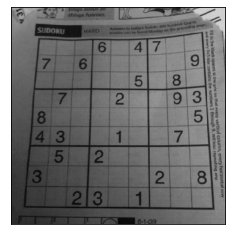

In [47]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

image = cv.imread("/content/drive/MyDrive/ColabFiles/sudoku.png")

image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

%matplotlib inline

plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.xticks([]), plt.yticks([])
plt.show()

## 2 - Limiarização (*thresholding*)


### 2.1 Limiarização simples

O método `threshold` pode ser utilizado para aplicar a limiarização utilizando o mesmo valor para em toda a imagem. Os parâmetros do método são:
* A imagem de origem
* O valor do limiar (*threshold*)
* O valor para o qual serão levados os pixels cujo valor for maior que o limiar (255, para branco)
* O tipo da limiarização, que define qual será o mapeamento dos pontos acima e abaixo do limiar (veja mais informações [aqui](https://docs.opencv.org/4.x/d7/d1b/group__imgproc__misc.html#gaa9e58d2860d4afa658ef70a9b1115576).

Método retorna o valor do limiar (nesse caso, o próprio parâmetro) e a imagem binária. Experimente variar o limiar e compare o resultado.

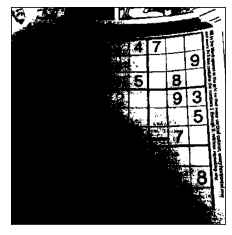

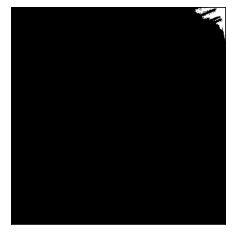

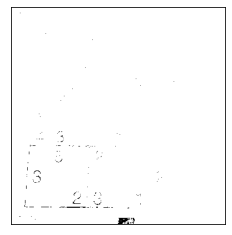

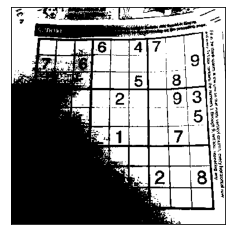

In [48]:
#127
ret,thresh127 = cv.threshold(image,127, 255, cv.THRESH_BINARY)

plt.imshow(thresh127, cmap='gray', vmin=0, vmax=255)
plt.xticks([]), plt.yticks([])
plt.show()

#200
ret,thresh127 = cv.threshold(image,200, 255, cv.THRESH_BINARY)

plt.imshow(thresh127, cmap='gray', vmin=0, vmax=255)
plt.xticks([]), plt.yticks([])
plt.show()

#12
ret,thresh127 = cv.threshold(image,12, 255, cv.THRESH_BINARY)

plt.imshow(thresh127, cmap='gray', vmin=0, vmax=255)
plt.xticks([]), plt.yticks([])
plt.show()

#100
ret,thresh127 = cv.threshold(image,100, 255, cv.THRESH_BINARY)

plt.imshow(thresh127, cmap='gray', vmin=0, vmax=255)
plt.xticks([]), plt.yticks([])
plt.show()

### 2.2 - Limiarização de Otsu

Para estimar o valor do limiar utilizando o método de Otsu, basta combinar (somar) o tipo da limiarização com a *flag* `THRESH_OTSU`. O valor estimado será o primeiro retorno do método, como informado anteriormente. Nesse caso, o valor de limiar passado como parâmetro para o método é indiferente.

Valor de threshold calculado:  94.0


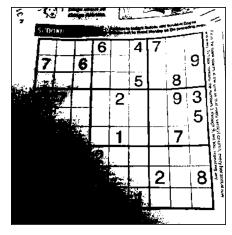

Valor de threshold calculado:  94.0


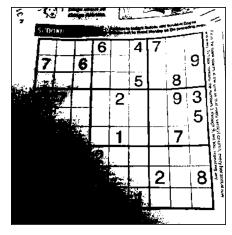

Valor de threshold calculado:  94.0


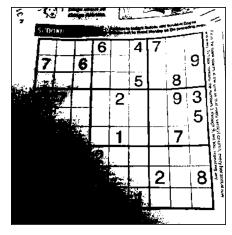

In [49]:
#O valor de treshold é indiferente nesse caso
ret,otsu = cv.threshold(image, 127, 255, cv.THRESH_BINARY + cv.THRESH_OTSU) 
print("Valor de threshold calculado: ", ret)

plt.imshow(otsu, cmap='gray', vmin=0, vmax=255)
plt.xticks([]), plt.yticks([])
plt.show()

#O valor de treshold é indiferente nesse caso
ret,otsu = cv.threshold(image, 50, 255, cv.THRESH_BINARY + cv.THRESH_OTSU) 
print("Valor de threshold calculado: ", ret)

plt.imshow(otsu, cmap='gray', vmin=0, vmax=255)
plt.xticks([]), plt.yticks([])
plt.show()

#O valor de treshold é indiferente nesse caso
ret,otsu = cv.threshold(image, 250, 255, cv.THRESH_BINARY + cv.THRESH_OTSU) 
print("Valor de threshold calculado: ", ret)

plt.imshow(otsu, cmap='gray', vmin=0, vmax=255)
plt.xticks([]), plt.yticks([])
plt.show()

### 2.3 - Limiarização adaptativa

A limiarização adaptativa pode ser realizada com o método `adaptiveThreshold`, a qual recebe como parâmetros:
* A imagem de origem
* O valor para o qual serão levados os pixels cujo valor for maior que o limiar (255, para branco)
* O método utilizado para calcular o limiar adaptativo (média aritmética ou gaussiana)
* O tipo da limiarização, que define qual será o mapeamento dos pontos acima e abaixo do limiar
* O tamanho da vizinhança
* O valor da constante $C$ a ser subtraída da média

Esse método retorna apenas a imagem destino.


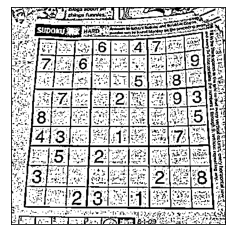

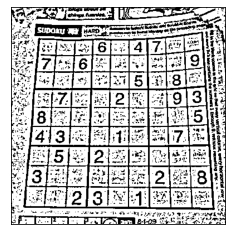

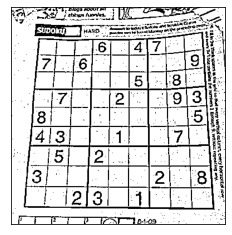

In [50]:
adaptive = cv.adaptiveThreshold(image, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2) 
plt.imshow(adaptive, cmap='gray', vmin=0, vmax=255)
plt.xticks([]), plt.yticks([])
plt.show()

#Método adaptativo diferente
adaptive = cv.adaptiveThreshold(image, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2) 
plt.imshow(adaptive, cmap='gray', vmin=0, vmax=255)
plt.xticks([]), plt.yticks([])
plt.show()

#Constante C diferente
adaptive = cv.adaptiveThreshold(image, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 5) 
plt.imshow(adaptive, cmap='gray', vmin=0, vmax=255)
plt.xticks([]), plt.yticks([])
plt.show()

### 2.4 - Exercícios

1 - Varie os parâmetros da limiarização adaptativa (tamanho da vizinhança, constante $C$ e método) e compare os resultados
2 - Aplique uma suavização (se precisar, consulte a aula anterior) na imagem antes da limiarização e compare o resultado

Tirando o ruído antes da limiarização


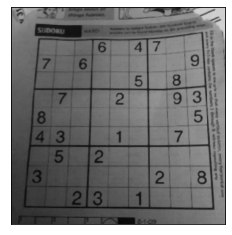

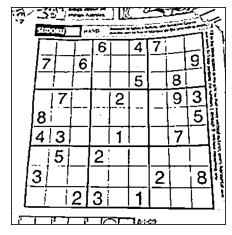

In [51]:
print("Tirando o ruído antes da limiarização")

#Filtro mediano para imagens com ruído "sal e pimenta"
median = cv.medianBlur(image,3)
plt.imshow(median, cmap='gray', vmin=0, vmax=255)
plt.xticks([]), plt.yticks([])
plt.show()

#Limiarização
adaptive2 = cv.adaptiveThreshold(median, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 5) 
plt.imshow(adaptive2, cmap='gray', vmin=0, vmax=255)
plt.xticks([]), plt.yticks([])
plt.show()

Tirando o ruído depois da limiarização


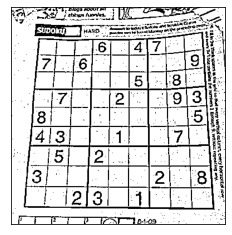

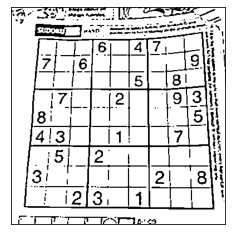

In [52]:
print("Tirando o ruído depois da limiarização")

#Limiarização
adaptive2 = cv.adaptiveThreshold(image, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 5) 
plt.imshow(adaptive2, cmap='gray', vmin=0, vmax=255)
plt.xticks([]), plt.yticks([])
plt.show()

#Filtro mediano para imagens com ruído "sal e pimenta"
median = cv.medianBlur(adaptive2,3)
plt.imshow(median, cmap='gray', vmin=0, vmax=255)
plt.xticks([]), plt.yticks([])
plt.show()


# 3 - Operações morfológicas

OpenCV possui os métodos `erode` e `dilate` que permitem realizar as operações de erosão e dilatação na imagem, respectivamente. Esses métodos recebem os seguintes parâmetros:
* A imagem fonte
* O elemento estruturante (pode ser criado manualmente ou usando o método `getStructuringElement`, o qual permite criar elementos estruturantes retangulares (`MORPH_RECT`), na forma de cruz (`MORPH_CROSS`) ou elipse (`MORPH_ELLIPSE`)
* O centro do elemento estruturante (opcional, por *default o elemento central da matriz)
* O número de iterações aplicadas (opcional, por *default* é 1)
* Tipo de borda (opcional, por *default* é borda constante com valor estimado automaticamente)
* Valor da borda constante (opcional, por *default* é calculado automaticamente)

A imagem utilizada pode ser obtida [aqui](https://drive.google.com/file/d/1Qk5L6cEbuvd6FDz9Wm_ja_vACyH-QC0z/view?usp=sharing).


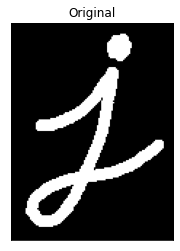

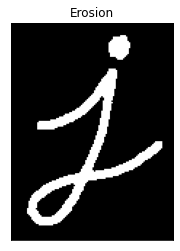

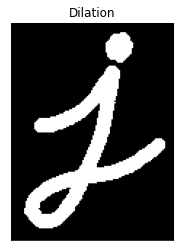

In [53]:
image = cv.imread("/content/drive/MyDrive/ColabFiles/j.png")

image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

structuringElementCross = cv.getStructuringElement(cv.MORPH_CROSS, (3,3))

erosion = cv.erode(image, structuringElementCross)

dilation = cv.dilate(image, structuringElementCross)

%matplotlib inline


plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title("Original")
plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(erosion, cmap='gray', vmin=0, vmax=255)
plt.title("Erosion")
plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(dilation, cmap='gray', vmin=0, vmax=255)
plt.title("Dilation")
plt.xticks([]), plt.yticks([])
plt.show()

### 3.1 - Exercícios

1.    Realize as operações de abertura e fecho, pela composição das operações de erosão e dilatação.

2.   Utilize as operações do exercício anterior para remover ruídos nas duas imagens nos links a seguir: [ruido1](https://drive.google.com/file/d/1Cm7agQJDjXGLrTb8wwlfkltn7W5d8J4u/view?usp=sharing) e [ruido2](https://drive.google.com/file/d/1W03psThI21ZO_sbm2WyxUuOXb7Dc5d7v/view?usp=sharing)

3. Verfique os efeitos da variação de parâmetros nessas operações.

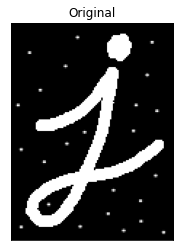

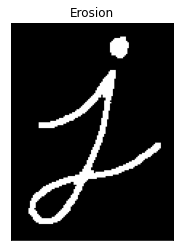

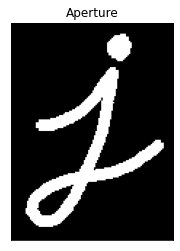

In [54]:
#ABERTURA - Erosão/remoção dos ruídos
image = cv.imread("/content/drive/MyDrive/ColabFiles/j_ruido2.png")

image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

structuringElementCross = cv.getStructuringElement(cv.MORPH_CROSS, (5,5))
#structuringElementCross = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5,5))
#structuringElementCross = cv.getStructuringElement(cv.MORPH_CROSS, (10,10))
#structuringElementCross = cv.getStructuringElement(cv.MORPH_CROSS, (2,2))

erosion = cv.erode(image, structuringElementCross)#, 50)

aperture = cv.dilate(erosion, structuringElementCross)

plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title("Original")
plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(erosion, cmap='gray', vmin=0, vmax=255)
plt.title("Erosion")
plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(aperture, cmap='gray', vmin=0, vmax=255)
plt.title("Aperture")
plt.xticks([]), plt.yticks([])
plt.show()

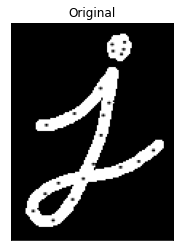

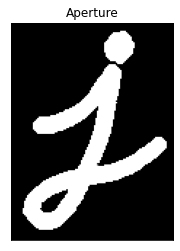

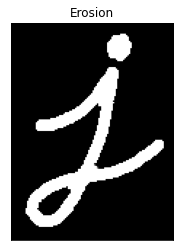

In [55]:
#FECHO - Preenchimento dos ruídos
image = cv.imread("/content/drive/MyDrive/ColabFiles/j_ruido1.png")

image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

structuringElementCross = cv.getStructuringElement(cv.MORPH_CROSS, (5,5))
#structuringElementCross = cv.getStructuringElement(cv.MORPH_CROSS, (10,10))
#structuringElementCross = cv.getStructuringElement(cv.MORPH_CROSS, (2,2))

aperture = cv.dilate(image, structuringElementCross)
erosion = cv.erode(aperture, structuringElementCross)

plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title("Original")
plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(aperture, cmap='gray', vmin=0, vmax=255)
plt.title("Aperture")
plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(erosion, cmap='gray', vmin=0, vmax=255)
plt.title("Erosion")
plt.xticks([]), plt.yticks([])
plt.show()